In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import tensorflow as tf
from datetime import datetime
from datetime import date
from sklearn.preprocessing import LabelEncoder

In [13]:
dataset = pd.read_csv('cars.csv')
dataset = dataset.drop(columns=['Images'])
dataset.head()

,Ask Price,Car Model,Brand,Depreciation,Registration Date,Category,Mileage
0,239800,A-Class A35 AMG 4MATIC Premium,Mercedes-Benz,21660,06-May-2021,Sports,2730
1,50000,Lancer 1.6A (COE till 08/2029),Mitsubishi,6230,17-Aug-2009,Sedan,128200
2,77800,308 1.6M GTI Turbo Glass Roof (New 10-yr COE),Peugeot,7780,30-Mar-2012,Sports,93300
3,122000,B-Class B200,Mercedes-Benz,15630,21-Mar-2018,Hatchback,3000
4,103000,Harrier 2.0A Turbo M,Toyota,13460,13-Dec-2017,SUV,66000


In [14]:
# converting registration date to age of car in days
today = date.today()
print(today.strftime('%d-%b-%Y'))

10-Aug-2021


In [15]:
dates = dataset.iloc[:, 4].values
dates

array(['06-May-2021', '17-Aug-2009', '30-Mar-2012', '21-Mar-2018',
       '13-Dec-2017', '16-Apr-2021', '30-Dec-2016', '24-Jan-2017',
       '28-Jul-2017', '12-Sep-2019', '26-Aug-2011', '13-Jul-2010',
       '01-Apr-2010', '06-Nov-2007', '27-Apr-2017', '17-Jul-2017',
       '17-Jan-2017', '30-Apr-2019', '10-Dec-2015', '15-Jul-2021',
       '26-Sep-2017', '25-Sep-2019', '31-Mar-2015', '06-Oct-2017',
       '25-May-2018', '16-May-2019', '15-Mar-2010', '01-Jul-2019',
       '08-Feb-2012', '02-Nov-2017', '15-Mar-2012', '02-Jan-2015',
       '17-Dec-2012', '11-May-2016', '28-Mar-2017', '05-Aug-2019',
       '09-Nov-2018', '28-Dec-2010', '29-Sep-2017', '07-Jul-2017',
       '16-Sep-2019', '22-Mar-2019', '30-Apr-2015', '21-Jul-2017',
       '06-Sep-2018', '27-Jul-2018', '30-Jun-2017', '25-Sep-2013',
       '28-Oct-2011', '06-Aug-2021', '05-Aug-2021', '05-Feb-2010',
       '23-Oct-2017', '13-Aug-2014', '14-Feb-2012', '06-Mar-2017',
       '31-Aug-2016', '30-Nov-2017', '27-Aug-2015', '15-Dec-20

In [16]:
age_in_days = []

for i in dates:
    d1 = datetime.strptime(i, "%d-%b-%Y").date()
    delta = today - d1
    difference = delta.days
    age_in_days.append(difference)

In [17]:
age_in_days

[96,
 4376,
 3420,
 1238,
 1336,
 116,
 1684,
 1659,
 1474,
 698,
 3637,
 4046,
 4149,
 5026,
 1566,
 1485,
 1666,
 833,
 2070,
 26,
 1414,
 685,
 2324,
 1404,
 1173,
 817,
 4166,
 771,
 3471,
 1377,
 3435,
 2412,
 3158,
 1917,
 1596,
 736,
 1005,
 3878,
 1411,
 1495,
 694,
 872,
 2294,
 1481,
 1069,
 1110,
 1502,
 2876,
 3574,
 4,
 5,
 4204,
 1387,
 2554,
 3465,
 1618,
 1805,
 1349,
 2175,
 1334,
 1614,
 2477,
 4679,
 1198,
 4,
 1937,
 2373,
 2972,
 1411,
 11,
 4715,
 574,
 257,
 1791,
 7,
 512,
 1662,
 868,
 4697,
 77,
 4,
 3584,
 4674,
 4379,
 1187,
 1393,
 1751,
 1337,
 4003,
 6195,
 1728,
 1566,
 3190,
 1883,
 368,
 1443,
 1096,
 3718,
 4382,
 2371,
 2476,
 1834,
 1064,
 1726,
 4500,
 1394,
 298,
 4691,
 4298,
 4004,
 271,
 1365,
 1425,
 1505,
 956,
 2534,
 690,
 971,
 1589,
 890,
 1208,
 3715,
 967,
 937,
 5381,
 1180,
 4444,
 1509,
 818,
 622,
 2477,
 621,
 4631,
 925,
 1748,
 3206,
 4374,
 1406,
 1072,
 2135,
 4061,
 4652,
 774,
 1320,
 1813,
 1839,
 334,
 3450,
 1820,
 2143,
 

In [18]:
dataset['Age'] = age_in_days
dataset.head()

,Ask Price,Car Model,Brand,Depreciation,Registration Date,Category,Mileage,Age
0,239800,A-Class A35 AMG 4MATIC Premium,Mercedes-Benz,21660,06-May-2021,Sports,2730,96
1,50000,Lancer 1.6A (COE till 08/2029),Mitsubishi,6230,17-Aug-2009,Sedan,128200,4376
2,77800,308 1.6M GTI Turbo Glass Roof (New 10-yr COE),Peugeot,7780,30-Mar-2012,Sports,93300,3420
3,122000,B-Class B200,Mercedes-Benz,15630,21-Mar-2018,Hatchback,3000,1238
4,103000,Harrier 2.0A Turbo M,Toyota,13460,13-Dec-2017,SUV,66000,1336


In [19]:
dataset = dataset.drop(columns=['Registration Date'])
dataset.head()

,Ask Price,Car Model,Brand,Depreciation,Category,Mileage,Age
0,239800,A-Class A35 AMG 4MATIC Premium,Mercedes-Benz,21660,Sports,2730,96
1,50000,Lancer 1.6A (COE till 08/2029),Mitsubishi,6230,Sedan,128200,4376
2,77800,308 1.6M GTI Turbo Glass Roof (New 10-yr COE),Peugeot,7780,Sports,93300,3420
3,122000,B-Class B200,Mercedes-Benz,15630,Hatchback,3000,1238
4,103000,Harrier 2.0A Turbo M,Toyota,13460,SUV,66000,1336


In [20]:
# converting category to integer values

models = dataset['Car Model'].values
brands = dataset['Brand'].values
categories = dataset['Category'].values

In [21]:
encoder = LabelEncoder()
models_data = encoder.fit_transform(models)

In [22]:
brands_data = encoder.fit_transform(brands)

In [23]:
categories_data = encoder.fit_transform(categories)

In [24]:
dataset.head()

,Ask Price,Car Model,Brand,Depreciation,Category,Mileage,Age
0,239800,A-Class A35 AMG 4MATIC Premium,Mercedes-Benz,21660,Sports,2730,96
1,50000,Lancer 1.6A (COE till 08/2029),Mitsubishi,6230,Sedan,128200,4376
2,77800,308 1.6M GTI Turbo Glass Roof (New 10-yr COE),Peugeot,7780,Sports,93300,3420
3,122000,B-Class B200,Mercedes-Benz,15630,Hatchback,3000,1238
4,103000,Harrier 2.0A Turbo M,Toyota,13460,SUV,66000,1336


In [25]:
dataset = dataset.drop(columns=['Car Model'])
dataset = dataset.drop(columns=['Brand'])
dataset = dataset.drop(columns=['Category'])

dataset['Car Model'] = models_data
dataset['Brand'] = brands_data
dataset['Category'] = categories_data

dataset.head()

,Ask Price,Depreciation,Mileage,Age,Car Model,Brand,Category
0,239800,21660,2730,96,78,22,5
1,50000,6230,128200,4376,337,23,4
2,77800,7780,93300,3420,35,27,5
3,122000,15630,3000,1238,120,22,0
4,103000,13460,66000,1336,311,38,3


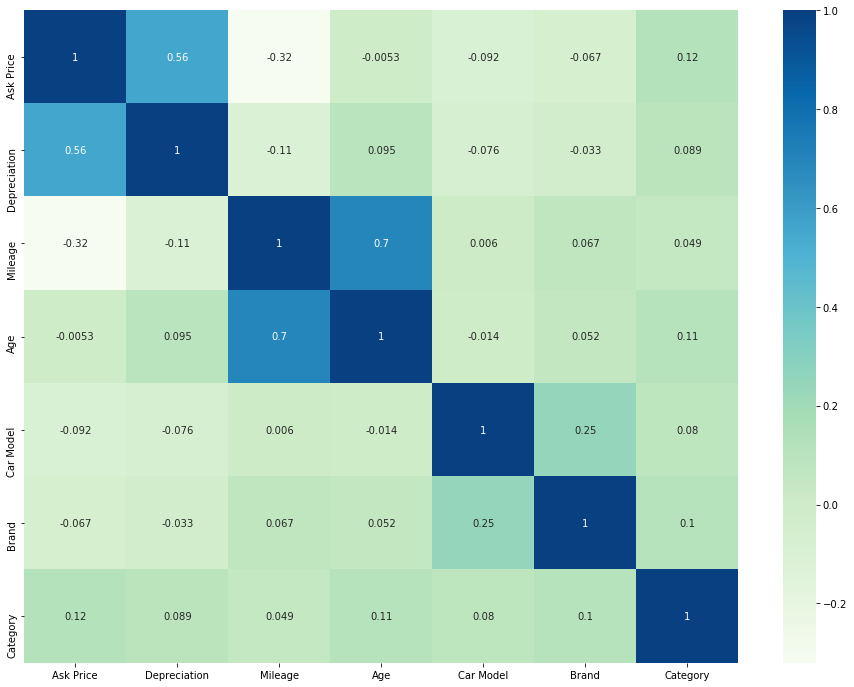

In [26]:
# feature selection and visualization

import seaborn as sns

pearson_corr_mat = dataset.corr()

plt.figure(figsize=(16,12))
sns.heatmap(data=pearson_corr_mat, annot=True, cmap='GnBu')
plt.show()

In [109]:
# splitting the data

X = dataset.iloc[:, 1:7]
X.head()

,Depreciation,Mileage,Age,Car Model,Brand,Category
0,21660,2730,95,78,22,5
1,6230,128200,4375,337,23,4
2,7780,93300,3419,35,27,5
3,15630,3000,1237,120,22,0
4,13460,66000,1335,311,38,3


In [110]:
y = dataset.iloc[:, 0]
y.head()

0    239800
1     50000
2     77800
3    122000
4    103000
Name: Ask Price, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

print(X_train.shape) # x_train and x_test shape should be 2D array
print(y_train.shape)

(587, 6)
(587,)


In [113]:
# training the model

from sklearn.linear_model import LinearRegression

linReg = LinearRegression()

linReg.fit(X_train, y_train)

LinearRegression()

In [115]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linReg.predict(X_train) 
r2_score(y_train, y_pred) 

0.41811101266104767

In [116]:
# Saving model to disk
pickle.dump(linReg, open('model.pkl','wb'))